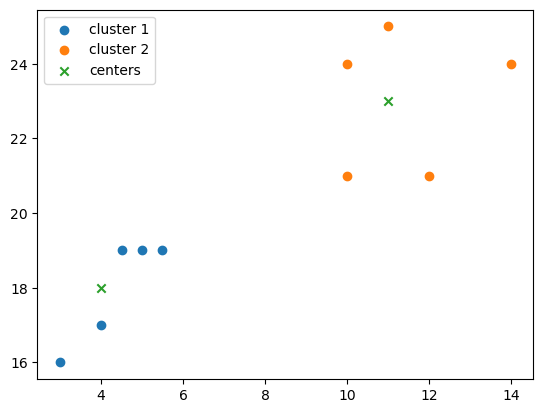

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# creating a single stacked 2d array containing the data
x = [4.5, 5, 10, 4, 3, 11, 14, 5.5, 10, 12]
y = [19, 19, 24, 17, 16, 25, 24, 19, 21, 21]
data = np.array(np.column_stack((x, y)))

K=2 # clusters
tol = 0.001 # minimum difference in centers
n, D = data.shape # extracting dimensions
c = np.array([[5, 18], [12, 23]]) # guesses for centers
c_old = np.zeros(c.shape) # creating array to store deprecated centers
d = np.zeros((K,n)) # creating array to store distances between clusters and centers

while np.abs(c - c_old).sum() > tol: # while distance is significant
    c_old = c.copy() # deprecating the guessed centers
    for i in range(K): # computing the squared distances between centers and clusters
        d[i,:] = np.sum((data - c[:,i].T)**2, 1)
    label = np.argmin(d,0) # assigning the points to the nearest cluster center
    minvals = np.amin(d,0)
    for i in range(K): # recomputing the cluster centers (i.e., centroid)
        c[:,i] = np.mean(data[np.where(label == i),:],1).reshape(1,2)
plt.scatter(data[np.where(label == 0),0], data[np.where(label == 0),1], label='cluster 1')
plt.scatter(data[np.where(label == 1),0], data[np.where(label == 1),1], label='cluster 2')
plt.scatter(c[0], c[1], marker="x", label='centers')
plt.legend()

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/ionosphere.data', delimiter=',', header=None) # reading the data in
data = data.drop(34, axis = 1) # dropping the label, keeping only the features for pca
K=7 # reduced dimensions
n=data.shape[0] # number of data points
data = data - np.mean(data, axis=0) # centering the data
[U,D2,UT]= np.linalg.svd((data.T @ data)/n) # creating the covariance matrix
new_data = data@U[:,:K]
print(data.shape)
print(new_data.shape)

(351, 34)
(351, 7)


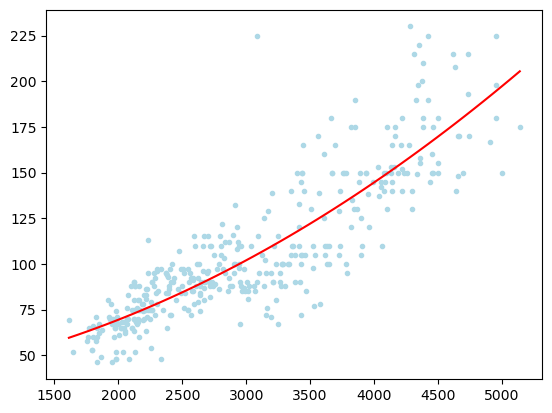

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# loading the datasets
horsepower = np.loadtxt('data/Horsepower.txt')
weight = np.loadtxt('data/Weight.txt')

# creating array to store values of features in a quadratic framework
X = np.ones((len(weight), 3))
for i in range(len(weight)):
    # X[i, 1] term will be 1 for the x^0 term
    X[i,1] = weight[i]    # x term
    X[i,2] = weight[i]**2 # x^2 term
X = np.matrix(X)
Y = np.matrix(horsepower).T
beta = np.linalg.solve(X.T*X,X.T*Y)
beta1 = beta[0,0]
beta2 = beta[1,0]
beta3 = beta[2,0]
weight_fitted = np.linspace(np.min(weight), np.max(weight))
horsepower_fitted = beta1 + beta2*weight_fitted + beta3*weight_fitted**2
plt.scatter(weight, horsepower, marker=".", c="lightblue")
plt.plot(weight_fitted, horsepower_fitted, c="red")